In [11]:
from carps.analysis.generate_report import load_results
from carps.analysis.gather_data import normalize_logs
import pandas as pd
from pathlib import Path
from carps.analysis.utils import filter_only_final_performance
from carps.analysis.gather_data import filelogs_to_df, get_interpolated_performance_df
from dacboenv.experiment.analysis.utils import postprocess_benchmarks, RWBM
from dacboenv.experiment.analysis.utils import postprocess_benchmarks

key_performance = "log_regret"

result_dir = Path("../resultssawei")
logs = load_results(result_dir / "logs.parquet")
logs_cfg = pd.read_parquet(result_dir / "logs_cfg.parquet")
# ids = (logs["optimizer_id"] == "SAWEI-P") & (logs["task_id"].str.startswith("bbob/2"))
# logs.loc[ids, "n_trials"] += 15
logs = normalize_logs(logs)
logs.loc[logs["benchmark_id"] == "BNNBO", "benchmark_id"] = RWBM  # fix legacy naming
logs = postprocess_benchmarks(logs, logs_cfg)

def fix_benchmark_id(row: pd.Series) -> str:
        if row["task_id"].startswith("bbob/2"):
            return "BBOB-2d"
        if row["task_id"].startswith("bbob/8"):
            return "BBOB-8d"
        return row["benchmark_id"]
logs["benchmark_id"] = logs.apply(fix_benchmark_id, axis="columns")



[12:37:02] INFO     Loading results from ../resultssawei/logs.parquet                       ]8;id=165943;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py\generate_report.py]8;;\:]8;id=330559;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py#1099\1099]8;;\

           INFO     Preprocessing results                                                   ]8;id=732906;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py\generate_report.py]8;;\:]8;id=620804;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py#1103\1103]8;;\

           INFO     Columns: Index(['task_id', 'optimizer_id', 'seed', 'level_3',           ]8;id=982959;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py\generate_report.py]8;;\:]8;id=589467;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py#1104\1104]8;;\
                    'n_trials',                                                                                    
                           'n_function_calls', 'trial_info__config',                                               
                    'trial_info__instance',                                                                        
                           'trial_info__seed', 'trial_info__budget',                                               
                           'trial_info__normalized_budget', 'trial_info__name',                                    
                           'trial_info__checkpoint', 'trial_info__cutoff',                                         
                    'trial_value__cost',                                                                           
                           'trial_value__time', 'trial_value__virtual_time',                                       
                    'trial_value__status',                                                                         
                           'trial_value__starttime', 'trial_value__endtime',                                       
                    'benchmark_id',                                                                                
                           'task.optimization_resources.n_trials', 'trial_value__cost_raw',                        
                           'trial_value__cost_inc', 'task_type', 'time', 'experiment_id'],                         
                          dtype='object')                                                                          

           INFO     ...normalizing                                                          ]8;id=186567;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py\generate_report.py]8;;\:]8;id=247687;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py#1110\1110]8;;\

           INFO     Start normalization...                                                       ]8;id=891745;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=747504;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#611\611]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=987038;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=890565;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#612\612]8;;\

           INFO     Normalize cost...                                                            ]8;id=996523;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=726852;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#614\614]8;;\

[12:37:03] INFO     Calc normalized incumbent cost...                                            ]8;id=849939;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=676405;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#630\630]8;;\

           INFO     Normalize time...                                                            ]8;id=867219;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=989709;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#650\650]8;;\

           INFO     Done.                                                                        ]8;id=154189;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=137229;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#653\653]8;;\

           INFO     Start normalization...                                                       ]8;id=694596;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=293671;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#611\611]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=890088;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=445138;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#612\612]8;;\

           INFO     Normalize cost...                                                            ]8;id=895534;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=45033;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#614\614]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=388369;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=619925;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#630\630]8;;\

           INFO     Normalize time...                                                            ]8;id=357451;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=442671;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#650\650]8;;\

[12:37:04] INFO     Done.                                                                        ]8;id=443938;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=926073;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#653\653]8;;\

/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/adaptaf/adaptaf/utils.py:536: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("task_id").apply(calc_fmax).reset_index(drop=True)
/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/.env/lib/python3.12/site-packages/pandas/core/algorithms.py:1743: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)
/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/adaptaf/adaptaf/utils.py:422: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either 

Processing BBOB...
Processing YAHPO...


100%|██████████| 20/20 [00:00<00:00, 21.98it/s]
/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/adaptaf/adaptaf/utils.py:308: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("task_id").apply(calc_fmin).reset_index(drop=True)


Processing nasengb...


100%|██████████| 8/8 [00:00<00:00, 44.10it/s]
/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/adaptaf/adaptaf/utils.py:401: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("task_id").apply(calc_fmin).reset_index(drop=True)
/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/adaptaf/adaptaf/utils.py:537: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return data.groupby("benchmark_id").apply

# Log Regret over Time Single Task

# 2d fid8: Final Log Regret Boxplot & Log Regret over Time

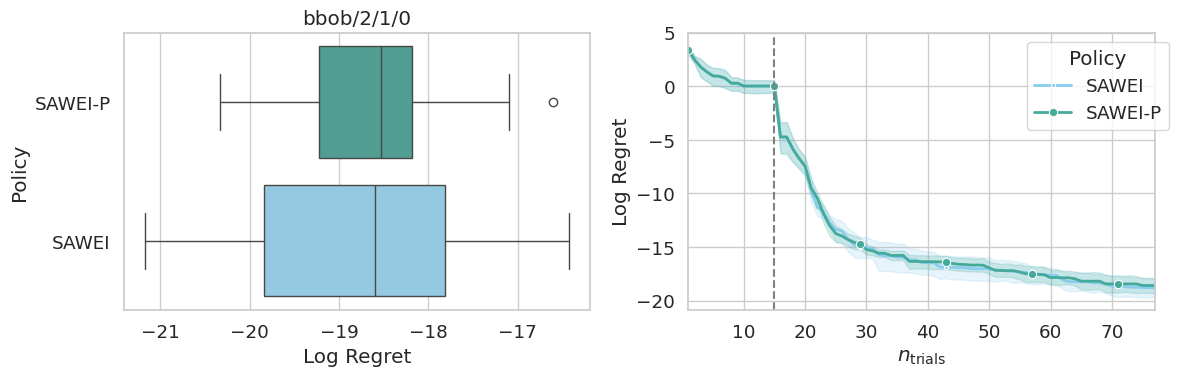

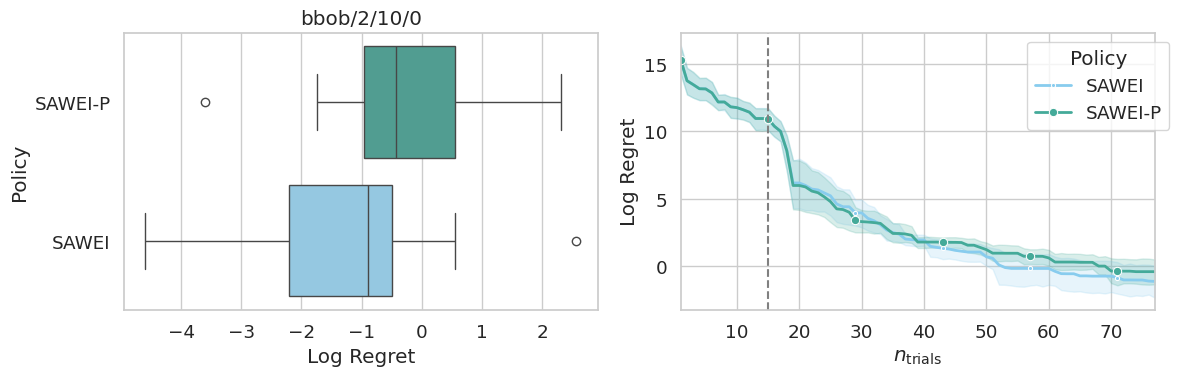

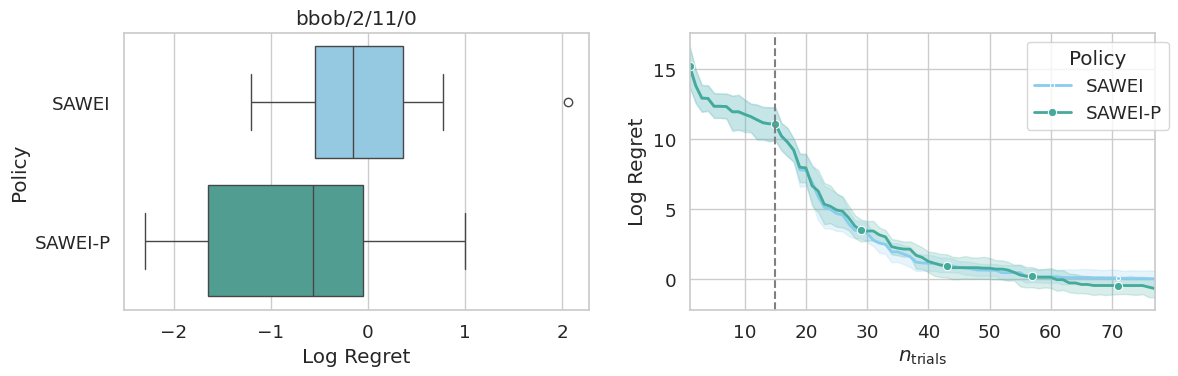

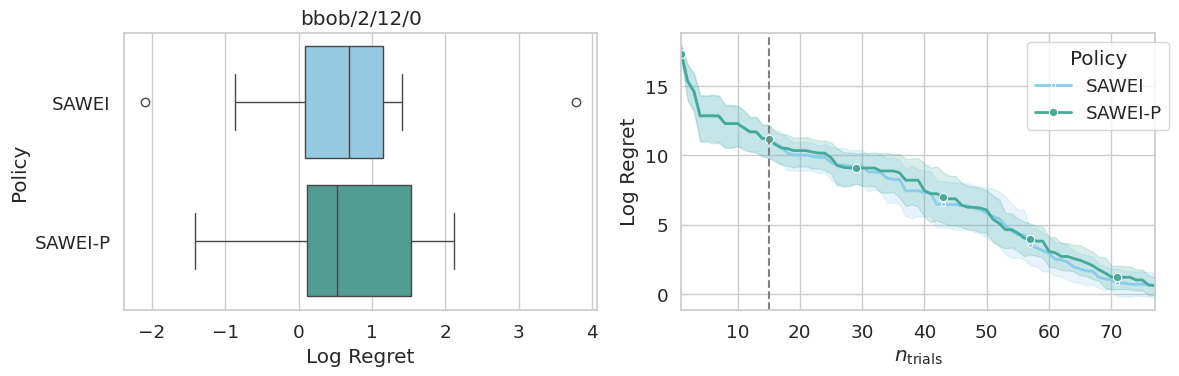

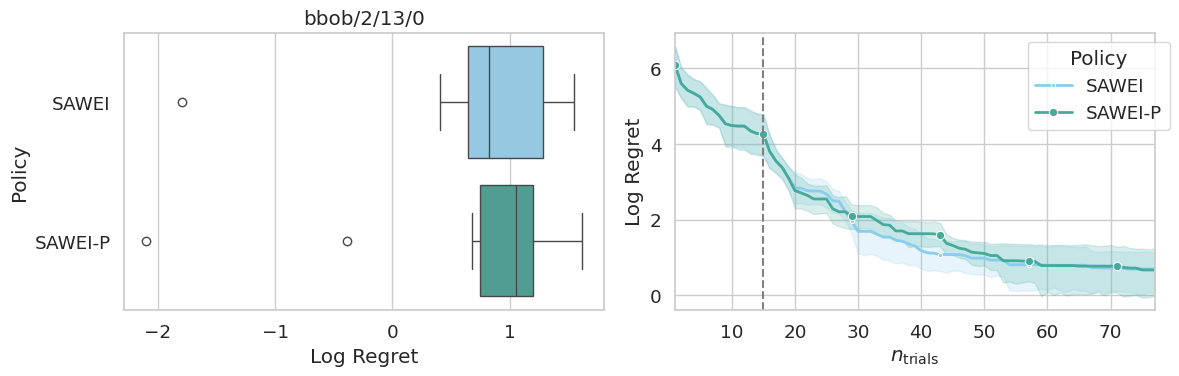

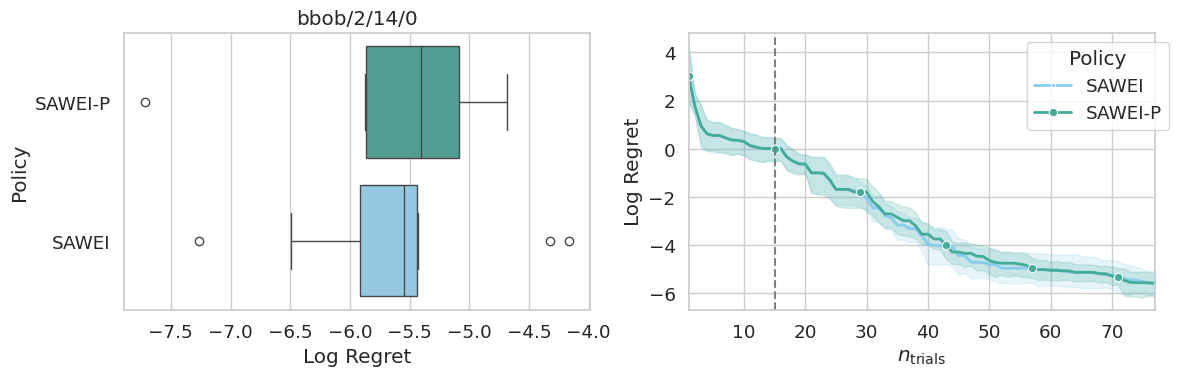

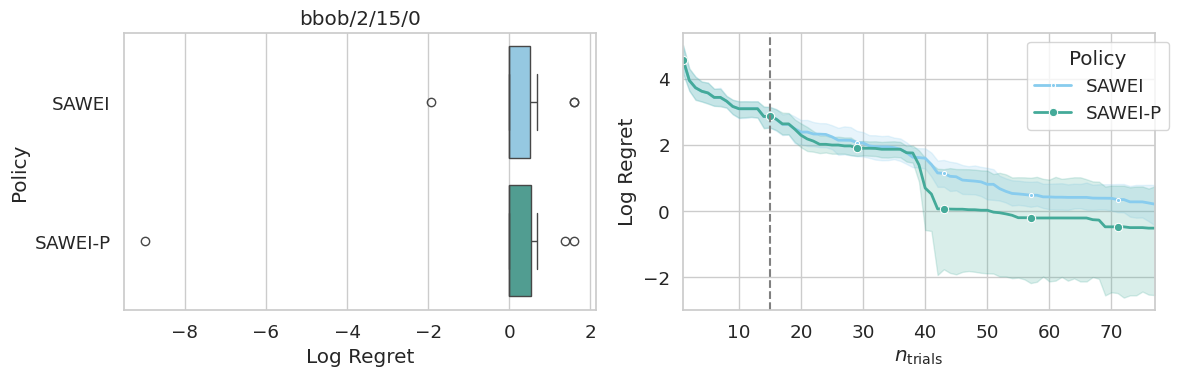

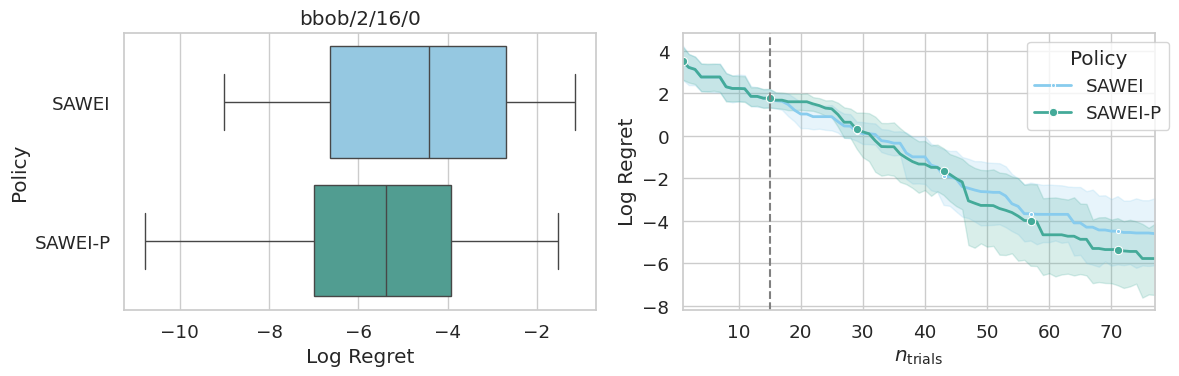

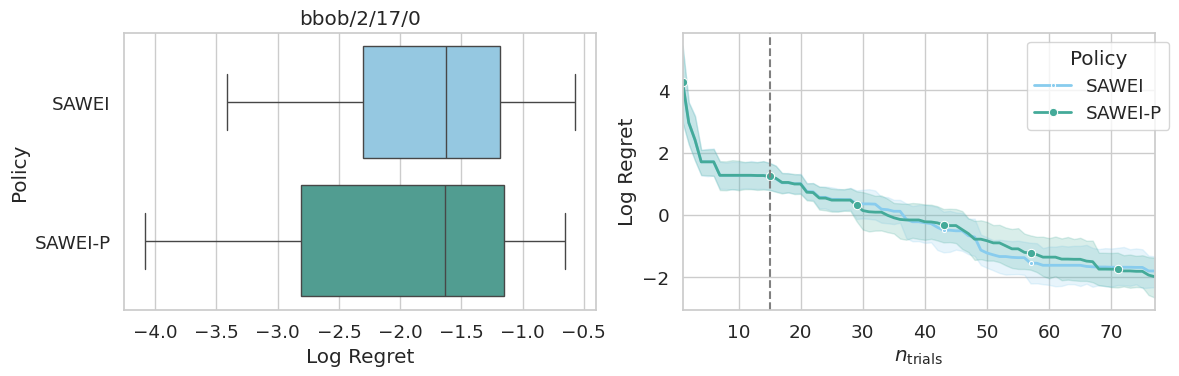

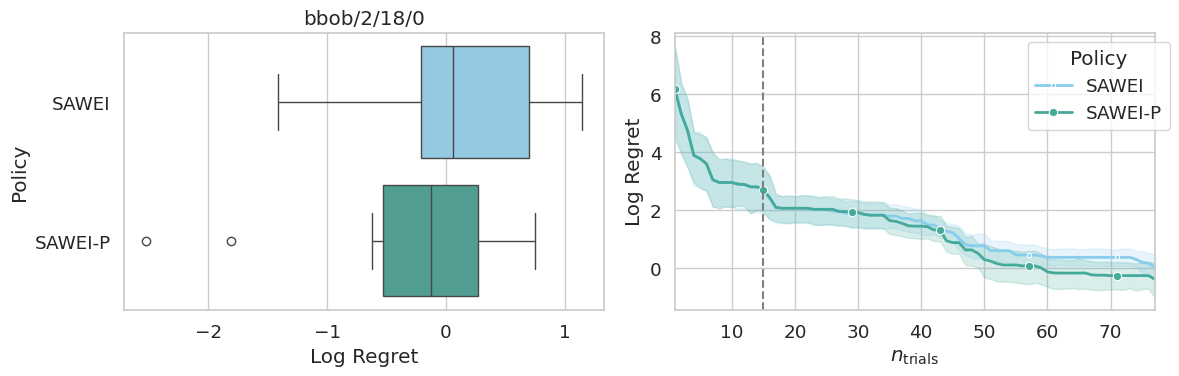

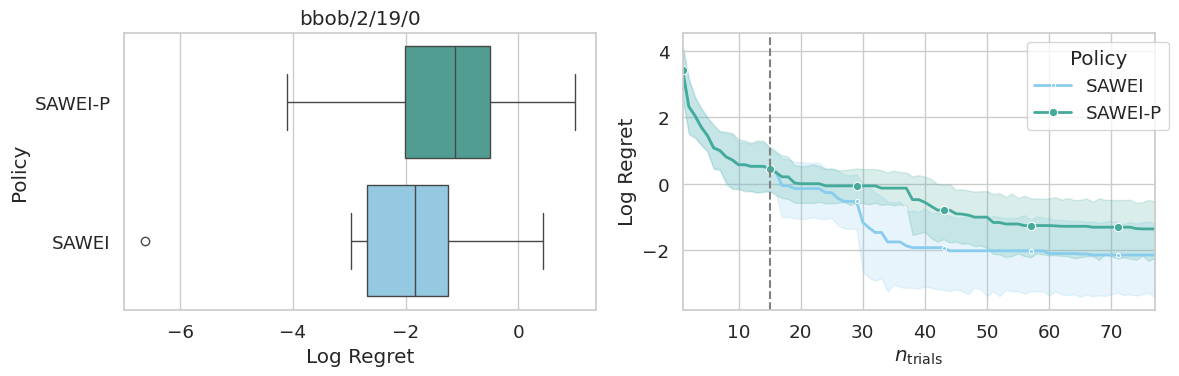

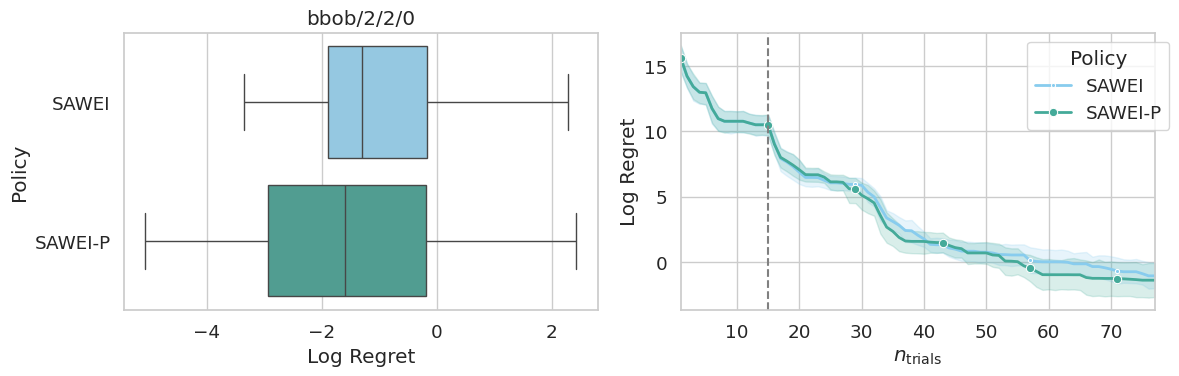

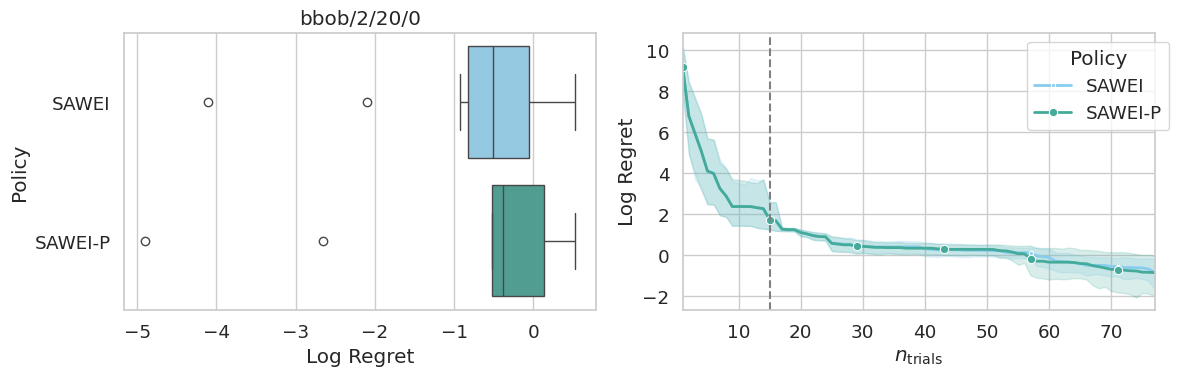

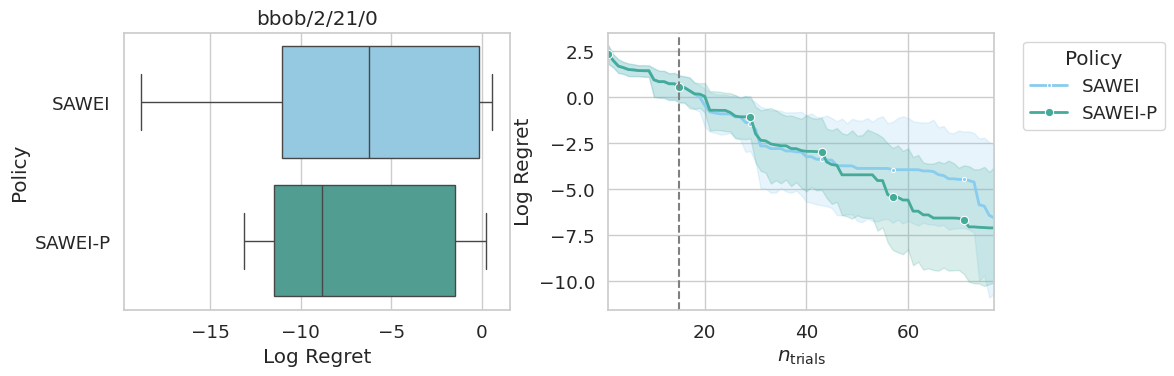

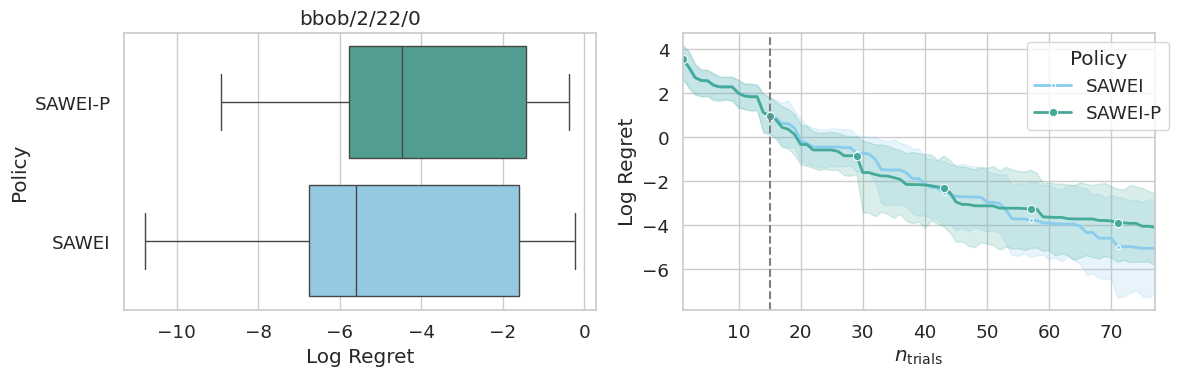

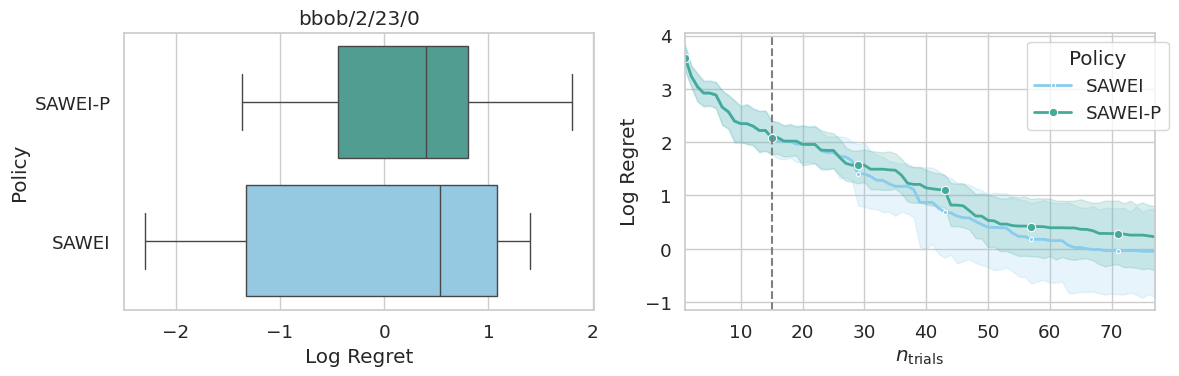

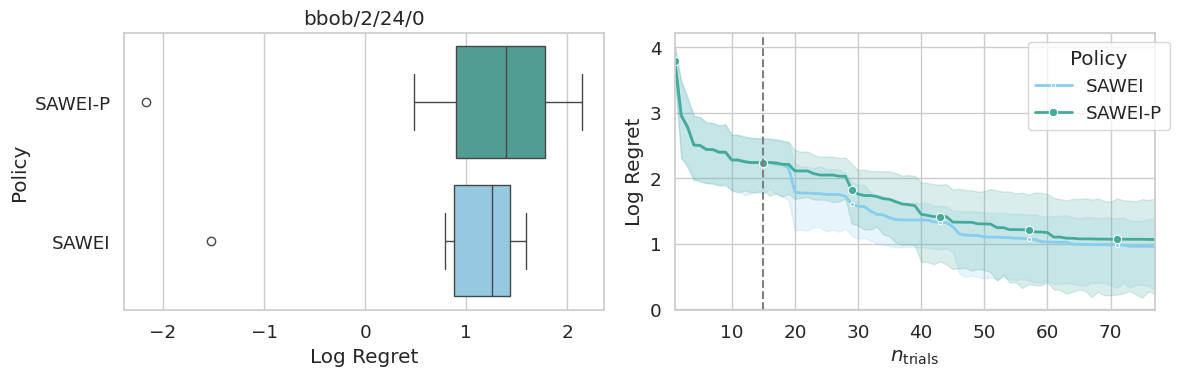

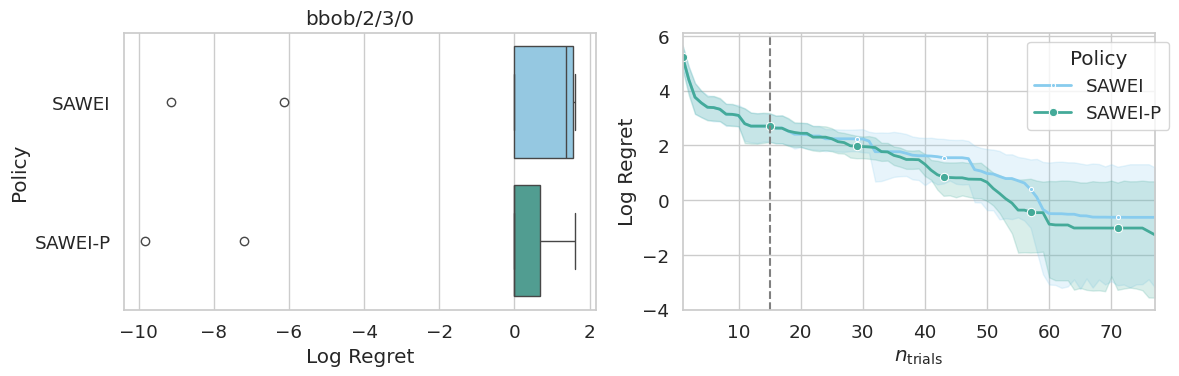

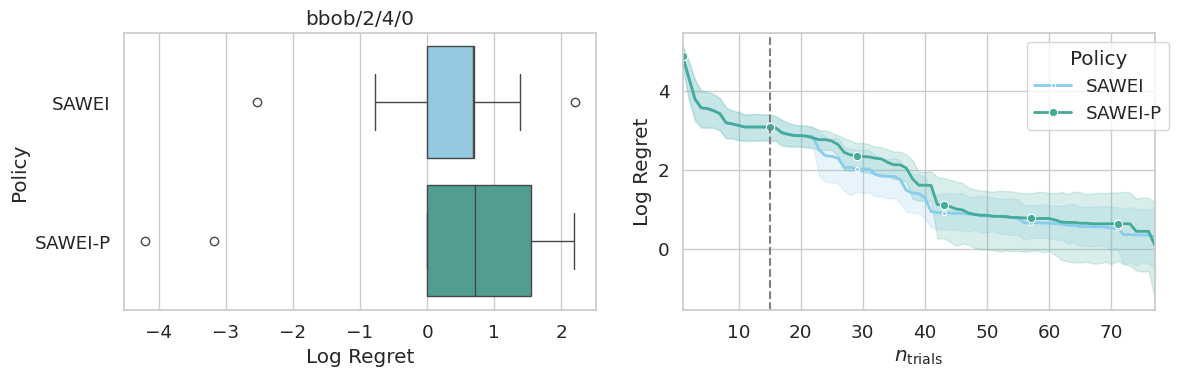

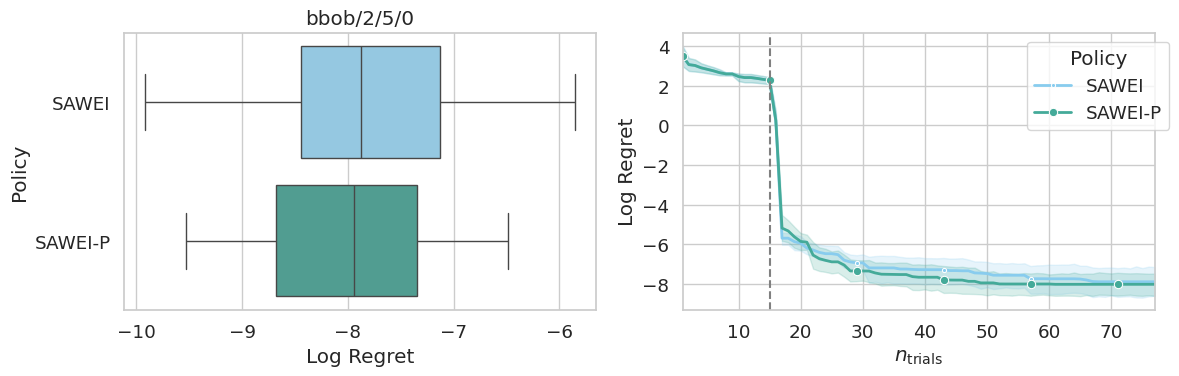

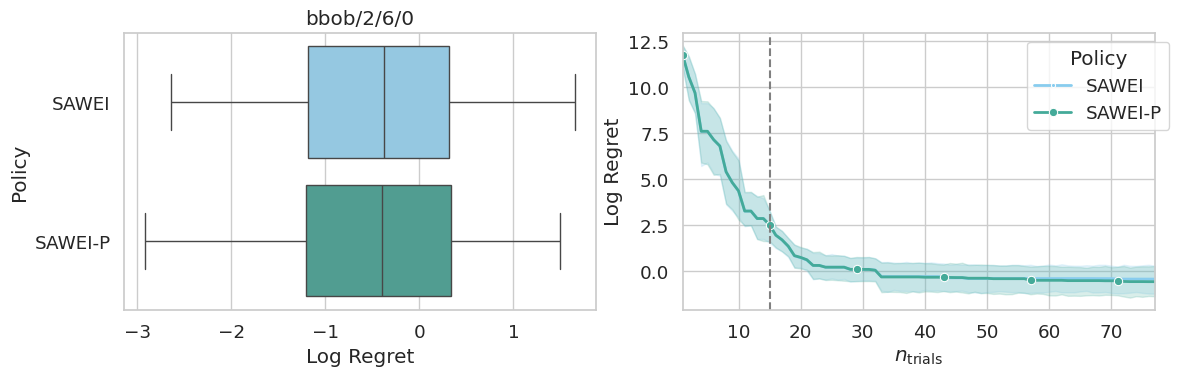

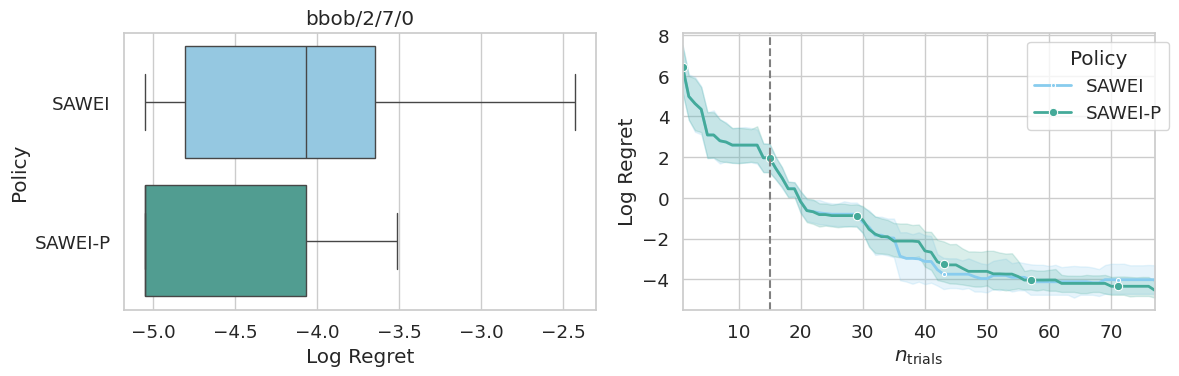

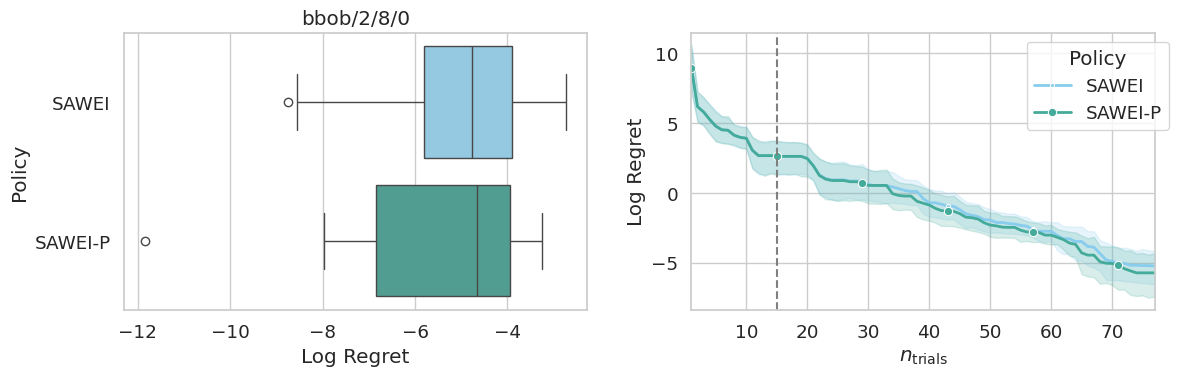

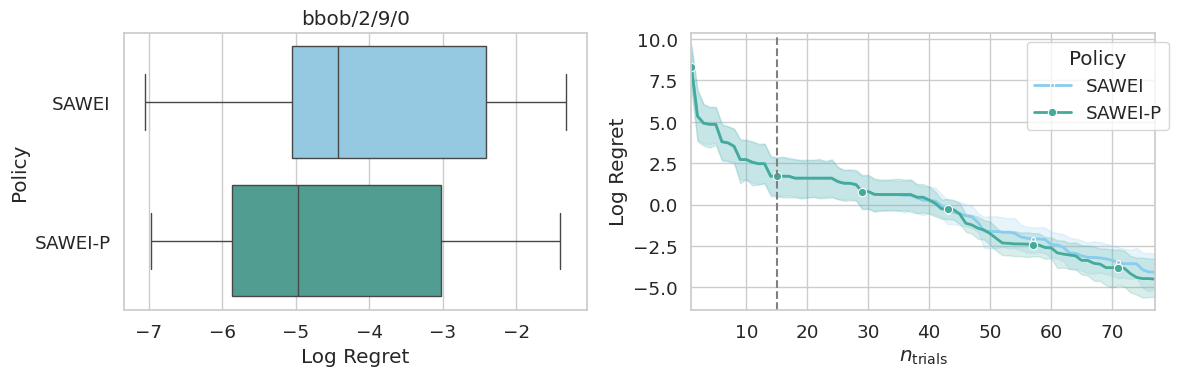

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from dacboenv.experiment.analysis.utils import sort_df_by_mean
from carps.analysis.utils import (
    filter_only_final_performance,
    get_color_palette,
    get_marker_palette,
    savefig,
    setup_seaborn,
)
from matplotlib.lines import Line2D

%matplotlib inline

setup_seaborn(font_scale=1.2)

# logs = pd.read_parquet(logs_fn)
# logs = filter_experiments(logs)
palette = get_color_palette(logs)
logs = sort_df_by_mean(logs, key_performance=key_performance)
hue_order = logs["optimizer_id"].unique()
markers = get_marker_palette(logs)

for task_id, gdf in logs.groupby("task_id"):
    if not task_id.startswith("bbob/2"):
        continue
    fig = plt.figure(figsize=(12,4))
    axes = fig.subplots(ncols=2, sharex=False, sharey=False)
    ax = axes[1]
    ax = sns.lineplot(data=gdf, x="n_trials", y=key_performance, hue="optimizer_id", style="optimizer_id",
                palette=palette, dashes=False, markers=markers, markevery=14, ax=ax, hue_order=hue_order,
                linewidth=2
                )
    ax.axvline(15, color="grey", linestyle="--")
    ax.legend(title="Policy", bbox_to_anchor=(1.05, 1))
    ax.set_xlim(gdf["n_trials"].min(), gdf["n_trials"].max())
    ax.set_xlabel("$n_\\mathrm{trials}$")
    ax.set_ylabel("Log Regret")

    df_final = filter_only_final_performance(gdf)
    df_final = sort_df_by_mean(df_final, key_performance=key_performance)
    ax = axes[0]
    ax = sns.boxplot(data=df_final, x=key_performance, y="optimizer_id", hue="optimizer_id", palette=palette, ax=ax)
    ax.set_ylabel("Policy")
    ax.set_xlabel("Log Regret")
    ax.set_title(task_id)
    fig.tight_layout()
    # savefig(fig=fig, filename="figures/resultssawei/fid8_2d")
    plt.show()


# Fid8: 2d and 8d boxplot

# Fid8 Generalization on BBOB 2d

['bbob/2/1/0' 'bbob/2/24/0' 'bbob/2/3/0' 'bbob/2/23/0' 'bbob/2/4/0'
 'bbob/2/5/0' 'bbob/2/21/0' 'bbob/2/22/0' 'bbob/2/20/0' 'bbob/2/9/0'
 'bbob/2/8/0' 'bbob/2/6/0' 'bbob/2/7/0' 'bbob/2/13/0' 'bbob/2/12/0'
 'bbob/2/14/0' 'bbob/2/15/0' 'bbob/2/10/0' 'bbob/2/11/0' 'bbob/2/19/0'
 'bbob/2/2/0' 'bbob/2/18/0' 'bbob/2/16/0' 'bbob/2/17/0']


/tmp/ipykernel_456923/2360438270.py:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  solved_counts = df_plot.groupby("optimizer_id")["solved"].sum()


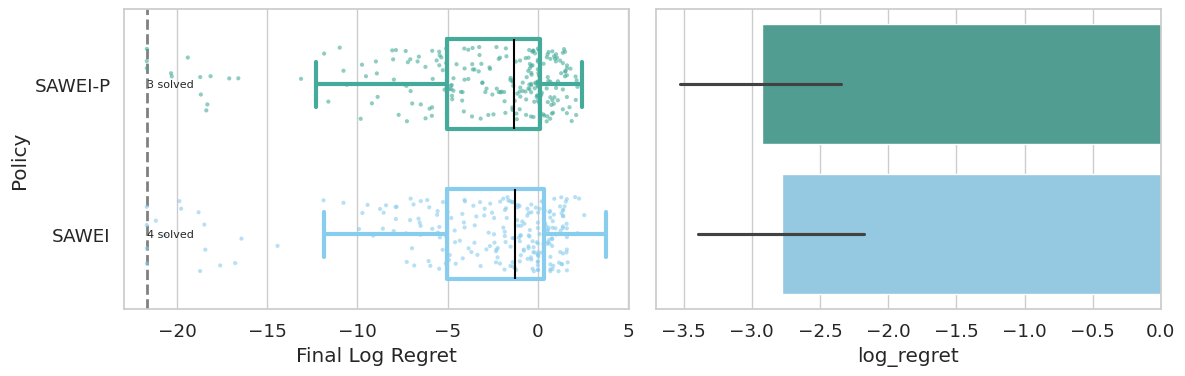

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from dacboenv.experiment.analysis.utils import sort_df_by_mean
from carps.analysis.utils import (
    filter_only_final_performance,
    get_color_palette,
    get_marker_palette,
    savefig,
    setup_seaborn,
)
from carps.analysis.gather_data import normalize
from matplotlib.lines import Line2D
import numpy as np

%matplotlib inline

setup_seaborn(font_scale=1.2)

key_performance = "log_regret"
# logs = pd.read_parquet(logs_fn)
# logs = filter_experiments(logs)
palette = get_color_palette(logs)
logs = logs[
    (logs["task_id"].str.startswith("bbob/2")) \
    & (~logs["optimizer_id"].str.contains("bbob_2d"))
]
print(logs["task_id"].unique())
logs = sort_df_by_mean(logs, key_performance=key_performance)
df_final = filter_only_final_performance(logs)

# -----------------------------
# Sort optimizers by performance
# -----------------------------
optimizer_order = (
    df_final
    .groupby("optimizer_id")["regret"]
    .mean()
    .sort_values()
    .index
)

# -----------------------------
# Automatic floor for -inf
# -----------------------------
finite_vals = df_final.loc[
    np.isfinite(df_final["log_regret"]),
    "log_regret"
]
floor = finite_vals.min() - 0.5

# -----------------------------
# Prepare plotting DataFrame
# -----------------------------
df_plot = df_final.copy()
df_plot["solved"] = df_plot["log_regret"].eq(-np.inf)
df_plot["log_regret_plot"] = df_plot["log_regret"].replace(-np.inf, floor)

df_plot["optimizer_id"] = pd.Categorical(
    df_plot["optimizer_id"],
    categories=optimizer_order,
    ordered=True
)

# -----------------------------
# Main plot: boxplot + jitter + annotations
# -----------------------------
fig = plt.figure(figsize=(12, 4))
axes = fig.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

ax = axes[0]
sns.stripplot(
    data=df_plot,
    y="optimizer_id",
    hue="optimizer_id",
    palette=palette,
    x="log_regret_plot",
    order=optimizer_order,
    jitter=0.25,
    size=3,
    alpha=0.6,
    ax=ax
)

sns.boxplot(
    data=df_plot,
    y="optimizer_id",
    x="log_regret_plot",
    hue="optimizer_id",
    palette=palette,
    order=optimizer_order,
    width=0.6,
    fliersize=0,
    ax=ax,
    fill=False,
    zorder=9999,
    linewidth=3,
    medianprops={"color": "black", "linewidth": 1.5},
)



# Annotate solved counts
solved_counts = df_plot.groupby("optimizer_id")["solved"].sum()

for y, opt in enumerate(optimizer_order):
    ax.text(
        floor + 0.02,
        y,
        f"{solved_counts[opt]} solved",
        va="center",
        ha="left",
        fontsize=8
    )

ax.axvline(floor, linestyle="--", linewidth=2, color="gray")
ax.set_xlabel("Final Log Regret")
ax.set_ylabel("Policy")


ax = axes[1]
ax = sns.barplot(data=df_plot, x=key_performance, y="optimizer_id", hue="optimizer_id", ax=ax, palette=palette)


plt.tight_layout()
savefig(fig=fig, filename="figures/resultssawei/fid8_2d_vs_bbob2d")
plt.show()

# key_performance_norm = "Log Regret (Normalized)"
# df_final[key_performance_norm] = df_final.groupby("task_id")["log_regret"].transform(normalize)

# df_final = sort_df_by_mean(df_final, key_performance=key_performance_norm)
# hue_order = logs["optimizer_id"].unique()
# markers = get_marker_palette(logs)

# fig = plt.figure(figsize=(10,3.5))
# ax = fig.add_subplot(111)
# ax = sns.boxplot(
#     data=df_final, x=key_performance_norm, hue="optimizer_id", y="optimizer_id", palette=palette, ax=ax)
# # ax.tick_params(axis="x", rotation=90)
# ax.set_xlabel("Log Regret (Normalized)")
# ax.set_ylabel("Policy")
# fig.tight_layout()
# savefig(fig=fig, filename="figures/results/fid8_2d_vs_8d")
# plt.show()
